In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords


In [4]:
data=pd.read_csv('IMDB Dataset.csv')

In [10]:
data.dropna(inplace=True)

In [14]:
def clean_review(review):
    text=' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return text

In [15]:
data['review']=data['review'].apply(clean_review)

In [20]:
from wordcloud import WordCloud

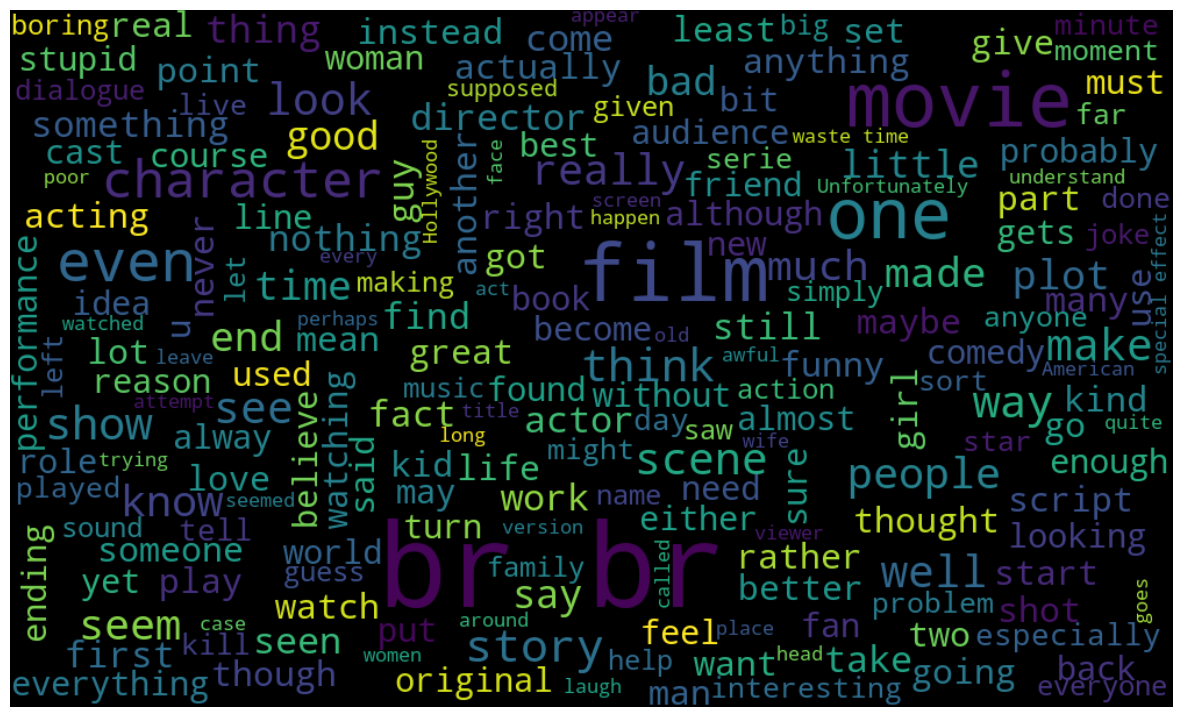

In [22]:
reviews=' '.join(word for word in data['review'][data['sentiment']=='negative'].astype(str))
wordcloud=WordCloud(height=600,width=1000,max_font_size=100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

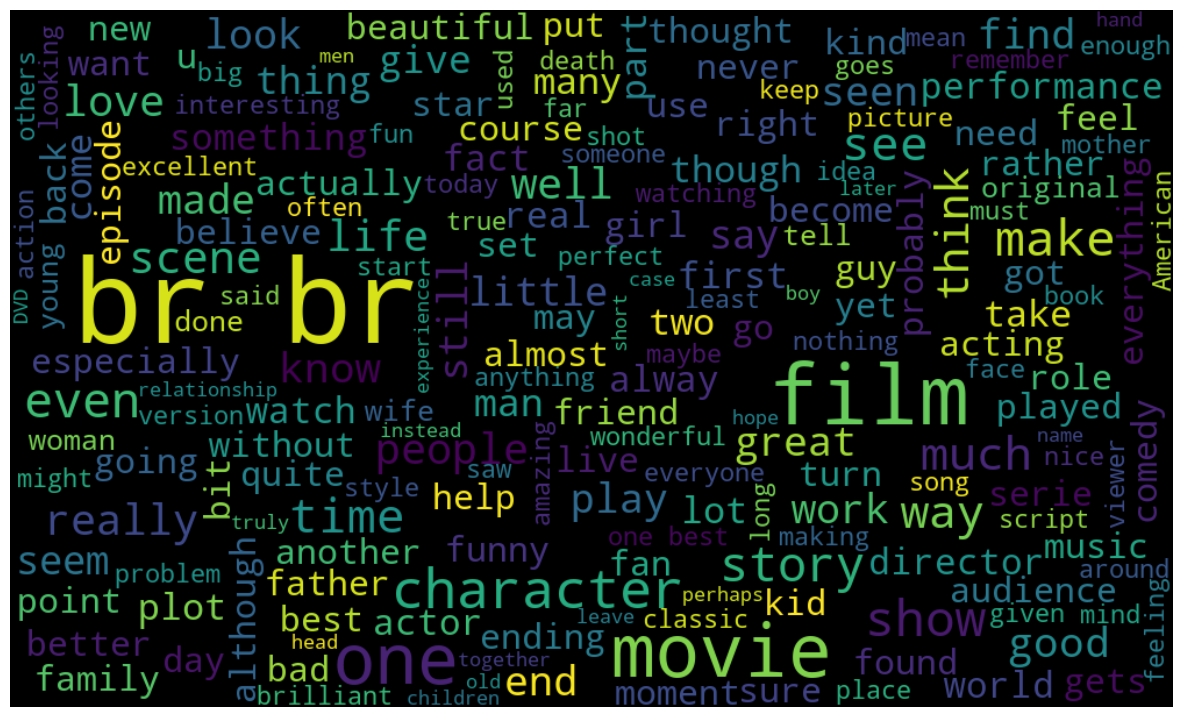

In [24]:
reviews=' '.join(word for word in data['review'][data['sentiment']=='positive'].astype(str))
wordcloud=WordCloud(height=600,width=1000,max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=3000)

In [28]:
reviews=cv.fit_transform(data['review']).toarray()

In [29]:
data['sentiment']=data['sentiment'].replace(['positive','negative'],[1,0])

C:\Users\Jitu\AppData\Local\Temp\ipykernel_15412\3724057555.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment']=data['sentiment'].replace(['positive','negative'],[1,0])


In [30]:
data['sentiment'].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model=LogisticRegression()

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
review_train,review_test,sentiment_train,sentiment_test=train_test_split(reviews, data['sentiment'], test_size=.2)

In [35]:
model.fit(review_train,sentiment_train)

LogisticRegression()

In [36]:
predict=model.predict(review_test)

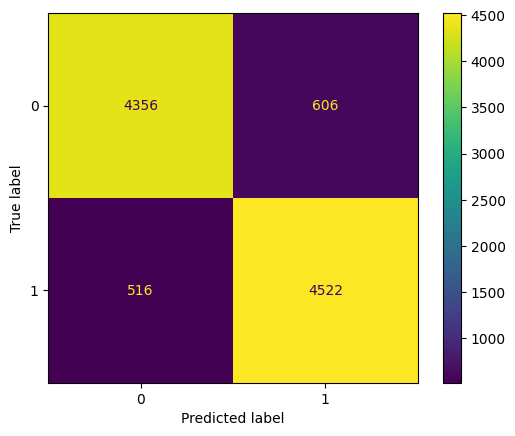

In [38]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(sentiment_test,predict,labels=model.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
display.plot()
plt.show()

In [39]:
import pickle as pk

In [40]:
pk.dump(model,open('model.pkl','wb'))

In [42]:
pk.dump(cv,open('scaler.pkl','wb'))